Step 4: In this phase different optimizers will be implemented for the 6 models from Step 3.

In [42]:
# Import libraries

import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import plot_model



import tensorflow_datasets as tfds

In [43]:
# Load the data

p_camelyon, p_camelyon_info = tfds.load("patch_camelyon", with_info=True)

In [44]:
# Defining a "normalize" function to process the data before feeding it into the deep neural network. 

def normalize(x):
  image, label = x['image'], x['label']
  image = tf.image.convert_image_dtype(image, tf.float32)
  label = tf.one_hot(label, 2, dtype=tf.float32)
  return image, label

In [45]:
# Applying "normalize" function along with others to the data

# Processing the training dataset
train_ds = p_camelyon['train'].map(normalize, num_parallel_calls=8)
train_ds = train_ds.shuffle(1024)
train_ds = train_ds.repeat()
train_ds = train_ds.batch(64)
train_ds = train_ds.prefetch(2)

# Processing validation dataset
validation_ds = p_camelyon['validation'].map(normalize, num_parallel_calls=8)
validation_ds = validation_ds.repeat()
validation_ds = validation_ds.batch(128)
validation_ds = validation_ds.prefetch(2)

#Processing the test dataset
test_ds = p_camelyon['test'].map(normalize, num_parallel_calls=8)
test_ds = test_ds.batch(128)
test_ds = test_ds.prefetch(2)

#Seperating image and label into different variables
train_images, train_labels = next(iter(train_ds))
valid_images, valid_labels = next(iter(validation_ds))
test_images, test_labels  = next(iter(test_ds))


In [46]:
import math

batch_size_for_training = 64
batch_size_for_validation = 128
batch_size_for_test = 128

training_size = 262144
validation_size = 32768
test_size =  32768
        

# Calculate steps for training and testing the model
calculate_steps_training = lambda x: int(math.ceil(1. * x / batch_size_for_training))
calculate_steps_validation = lambda x: int(math.ceil(1. * x / batch_size_for_validation))
calculate_steps_test= lambda x: int(math.ceil(1. * x / batch_size_for_test))

steps_per_epoch = calculate_steps_training(training_size) 
validation_steps = calculate_steps_validation(validation_size)
steps = calculate_steps_test(test_size)

print("Training steps: ", steps_per_epoch)
print("Validation steps: ", validation_steps)
print("Testing steps: ", steps)


Training steps:  4096
Validation steps:  256
Testing steps:  256


In [47]:
import matplotlib.pyplot as plt

def plot_hist(history):
  plt.plot(history.history["acc"])
  plt.plot(history.history["val_acc"])
  plt.title("Model Accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epochs")
  plt.legend(["train", "validation"], loc="upper left")
  plt.show()

In [48]:
# Building the Convolutonal Neural Network Version 2 Model 5.1

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# Rely activation functions only, with softmax activation function for the last Dense layer
x = Conv2D(16, (2,2), activation='relu', padding='valid')(input)
x = Conv2D(16, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='valid')(x)
x = Conv2D(32, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='relu', padding='valid')(x)
x = Conv2D(64, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.8)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(rate=0.8)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = adam
# Loss function = binary_cross_entropy
model_5_1_version_2 = Model(inputs=input, outputs = output)
model_5_1_version_2.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['acc'])

model_5_1_version_2.summary()
#plot_model(model_5_1_version_2)

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_54 (Conv2D)          (None, 95, 95, 16)        208       
                                                                 
 conv2d_55 (Conv2D)          (None, 93, 93, 16)        2320      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 46, 46, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 44, 44, 32)        4640      
                                                                 
 conv2d_57 (Conv2D)          (None, 42, 42, 32)        9248      
                                                          

In [49]:
# Building the Convolutonal Nueral Network Version 2 Model 5.2

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# Relu activation functions only, with softmax activation function for the last Dense layer
x = Conv2D(16, (2,2), activation='relu', padding='valid')(input)
x = Conv2D(16, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='valid')(x)
x = Conv2D(32, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='relu', padding='valid')(x)
x = Conv2D(64, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.8)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(rate=0.8)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = sgd
# Loss function = hinge
model_5_2_version_2 = Model(inputs=input, outputs = output)
model_5_2_version_2.compile(optimizer='sgd', 
              loss=tf.keras.losses.Hinge(),
              metrics=['acc'])

model_5_2_version_2.summary()
#plot_model(model_5_2_version_2)

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_60 (Conv2D)          (None, 95, 95, 16)        208       
                                                                 
 conv2d_61 (Conv2D)          (None, 93, 93, 16)        2320      
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 46, 46, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (None, 44, 44, 32)        4640      
                                                                 
 conv2d_63 (Conv2D)          (None, 42, 42, 32)        9248      
                                                          

In [50]:
# Building the Convolutonal Nueral Network Version 2 Model 5.3

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# Relu activation functions only, with softmax activation function for the last Dense layer
x = Conv2D(16, (2,2), activation='relu', padding='valid')(input)
x = Conv2D(16, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='valid')(x)
x = Conv2D(32, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='relu', padding='valid')(x)
x = Conv2D(64, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.8)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(rate=0.8)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = adagrad
# Loss function =   MSE
model_5_3_version_2 = Model(inputs=input, outputs = output)
model_5_3_version_2.compile(optimizer='adagrad', 
              loss='MSE',
              metrics=['acc'])

model_5_3_version_2.summary()
#plot_model(model_5_3_version_2)

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_66 (Conv2D)          (None, 95, 95, 16)        208       
                                                                 
 conv2d_67 (Conv2D)          (None, 93, 93, 16)        2320      
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 46, 46, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 44, 44, 32)        4640      
                                                                 
 conv2d_69 (Conv2D)          (None, 42, 42, 32)        9248      
                                                          

Epoch 1/10
4096/4096 [==============================] - 108s 26ms/step - loss: 0.4202 - acc: 0.8158 - val_loss: 0.3859 - val_acc: 0.8286
Epoch 2/10
4096/4096 [==============================] - 107s 26ms/step - loss: 0.3060 - acc: 0.8795 - val_loss: 0.3622 - val_acc: 0.8513
Epoch 3/10
4096/4096 [==============================] - 110s 27ms/step - loss: 0.2666 - acc: 0.8972 - val_loss: 0.3501 - val_acc: 0.8581
Epoch 4/10
4096/4096 [==============================] - 134s 33ms/step - loss: 0.2479 - acc: 0.9059 - val_loss: 0.4231 - val_acc: 0.8414
Epoch 5/10
4096/4096 [==============================] - 111s 27ms/step - loss: 0.2324 - acc: 0.9130 - val_loss: 0.3842 - val_acc: 0.8484
Epoch 6/10
4096/4096 [==============================] - 130s 32ms/step - loss: 0.2209 - acc: 0.9175 - val_loss: 0.3424 - val_acc: 0.8627
Epoch 7/10
4096/4096 [==============================] - 111s 27ms/step - loss: 0.2156 - acc: 0.9204 - val_loss: 0.4135 - val_acc: 0.8414
Epoch 8/10
4096/4096 [===================

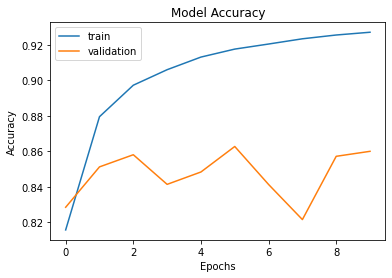

In [51]:
# Training the model 5.1 Version 2
history_5_1_version_2= model_5_1_version_2.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)
plot_hist(history_5_1_version_2)

Epoch 1/10
4096/4096 [==============================] - 111s 27ms/step - loss: 0.8537 - acc: 0.6514 - val_loss: 0.7579 - val_acc: 0.7422
Epoch 2/10
4096/4096 [==============================] - 109s 27ms/step - loss: 0.7461 - acc: 0.7552 - val_loss: 0.7279 - val_acc: 0.7720
Epoch 3/10
4096/4096 [==============================] - 107s 26ms/step - loss: 0.7279 - acc: 0.7731 - val_loss: 0.7522 - val_acc: 0.7478
Epoch 4/10
4096/4096 [==============================] - 124s 30ms/step - loss: 0.7080 - acc: 0.7928 - val_loss: 0.7097 - val_acc: 0.7899
Epoch 5/10
4096/4096 [==============================] - 123s 30ms/step - loss: 0.6951 - acc: 0.8059 - val_loss: 0.7155 - val_acc: 0.7844
Epoch 6/10
4096/4096 [==============================] - 109s 27ms/step - loss: 0.6951 - acc: 0.8055 - val_loss: 0.7162 - val_acc: 0.7841
Epoch 7/10
4096/4096 [==============================] - 109s 27ms/step - loss: 0.6925 - acc: 0.8080 - val_loss: 0.7291 - val_acc: 0.7713
Epoch 8/10
4096/4096 [===================

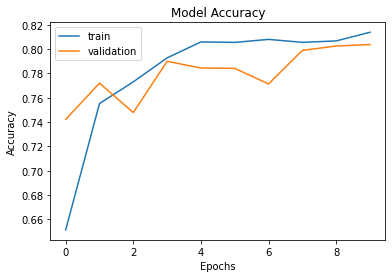

In [52]:
# Training the model 5.2 Version 2
history_5_2_version_2= model_5_2_version_2.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)
plot_hist(history_5_2_version_2)

Epoch 1/10
4096/4096 [==============================] - 110s 27ms/step - loss: 0.2459 - acc: 0.5543 - val_loss: 0.2229 - val_acc: 0.7220
Epoch 2/10
4096/4096 [==============================] - 108s 26ms/step - loss: 0.2027 - acc: 0.6990 - val_loss: 0.1755 - val_acc: 0.7403
Epoch 3/10
4096/4096 [==============================] - 108s 26ms/step - loss: 0.1782 - acc: 0.7501 - val_loss: 0.1660 - val_acc: 0.7515
Epoch 4/10
4096/4096 [==============================] - 124s 30ms/step - loss: 0.1699 - acc: 0.7640 - val_loss: 0.1660 - val_acc: 0.7505
Epoch 5/10
4096/4096 [==============================] - 122s 30ms/step - loss: 0.1662 - acc: 0.7704 - val_loss: 0.1619 - val_acc: 0.7545
Epoch 6/10
4096/4096 [==============================] - 108s 26ms/step - loss: 0.1632 - acc: 0.7751 - val_loss: 0.1607 - val_acc: 0.7556
Epoch 7/10
4096/4096 [==============================] - 107s 26ms/step - loss: 0.1609 - acc: 0.7779 - val_loss: 0.1611 - val_acc: 0.7556
Epoch 8/10
4096/4096 [===================

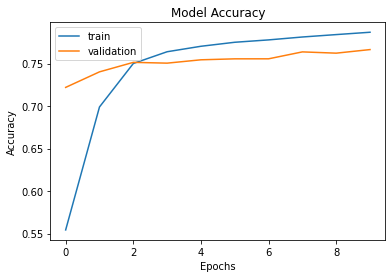

In [53]:
# Training the model 5.3 Version 2
history_5_3_version_2= model_5_3_version_2.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)
plot_hist(history_5_3_version_2)

In [54]:
# Saving the models

import joblib

joblib.dump(model_5_1_version_2, 'model_5_1_version_2')
joblib.dump(model_5_2_version_2, 'model_5_2_version_2')
joblib.dump(model_5_3_version_2, 'model_5_3_version_2')

INFO:tensorflow:Assets written to: ram://2d60ddb3-51dd-45d4-9a17-67cfe97465a3/assets


INFO:tensorflow:Assets written to: ram://2d60ddb3-51dd-45d4-9a17-67cfe97465a3/assets


INFO:tensorflow:Assets written to: ram://25282005-a0d7-4623-aec0-3930213388ae/assets


INFO:tensorflow:Assets written to: ram://25282005-a0d7-4623-aec0-3930213388ae/assets


INFO:tensorflow:Assets written to: ram://1301cf89-264b-4252-b808-3425014995a9/assets


INFO:tensorflow:Assets written to: ram://1301cf89-264b-4252-b808-3425014995a9/assets


['model_5_3_version_2']

In [55]:
# Loading the models

model_5_1_version_2_object = joblib.load('model_5_1_version_2')
model_5_2_version_2_object = joblib.load('model_5_2_version_2')
model_5_3_version_2_object = joblib.load('model_5_3_version_2')

In [56]:
# Evaluating the models

print("Test dataset accuracy for model 5.1 version 2 is: {0:.4f}".format(model_5_1_version_2_object.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 5.2 version 2 is: {0:.4f}".format(model_5_2_version_2_object.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 5.3 version 2 is: {0:.4f}".format(model_5_3_version_2_object.evaluate(test_ds, steps=steps, verbose=1)[1]))

256/256 [==============================] - 8s 31ms/step - loss: 0.4911 - acc: 0.8289
Test dataset accuracy for model 5.1 version 2 is: 0.8289
256/256 [==============================] - 9s 35ms/step - loss: 0.6848 - acc: 0.8152
Test dataset accuracy for model 5.2 version 2 is: 0.8152
256/256 [==============================] - 10s 36ms/step - loss: 0.1727 - acc: 0.7540
Test dataset accuracy for model 5.3 version 2 is: 0.7540
